In [3]:
import pickle
import numpy as np
top1s = []
flops = []
configs = []
bn_lists = []
for i in range(1,58):
    result=[]
    file=open('/home/lewislou/OFAorigin/tutorial/subnetsearch/flop_accu/flop_acc'+str(i)+'.pickle',"rb")
    result=pickle.load(file) #读取文件到list
    top1s.append(result['top1'])
    flops.append(result['flop'])
    configs.append(result['configs'])
    bn_lists.append(result['bn_lists'])

In [13]:
former=[]
file=open('nets_6.pickle',"rb")
former_result=pickle.load(file) #读取文件到list
former_top1s = [74.202 ,74.968,76.134 ,77.54,78.346 ,79.03 ]
former_configs = former_result['configs']
former_bn = former_result['bn_lists']
former_flops = [212.13,230.19,275.47,337.35,497.40,693.5]

In [14]:
top1s = top1s + former_top1s
flops = flops + former_flops
configs = configs + former_configs
bn_lists = bn_lists + former_bn

In [29]:
data1 = []
for i in range(len(top1s)):
    data1.append([top1s[i],flops[i]])
data = np.array(data1)
data

array([[  72.888   ,  139.464959],
       [  73.948   ,  159.828596],
       [  74.626   ,  179.801088],
       [  74.868   ,  198.920904],
       [  75.282   ,  217.847971],
       [  75.528   ,  238.651932],
       [  75.676   ,  258.73479 ],
       [  75.856   ,  278.362794],
       [  76.71    ,  297.610323],
       [  77.334   ,  319.994581],
       [  77.38    ,  337.466548],
       [  77.136   ,  357.554942],
       [  77.382   ,  376.97904 ],
       [  77.62    ,  399.783974],
       [  77.494   ,  413.481526],
       [  77.576   ,  433.816758],
       [  77.914   ,  457.098114],
       [  77.956   ,  470.918575],
       [  78.08    ,  495.61061 ],
       [  77.968   ,  503.138606],
       [  78.03    ,  526.762024],
       [  78.352   ,  552.480582],
       [  78.304   ,  574.081778],
       [  78.472   ,  598.17783 ],
       [  78.4     ,  618.967682],
       [  68.912   ,   94.950769],
       [  69.686   ,   99.531225],
       [  69.832   ,  103.948505],
       [  70.022   ,

In [30]:
len(data),len(configs),len(bn_lists)

(63, 63, 63)

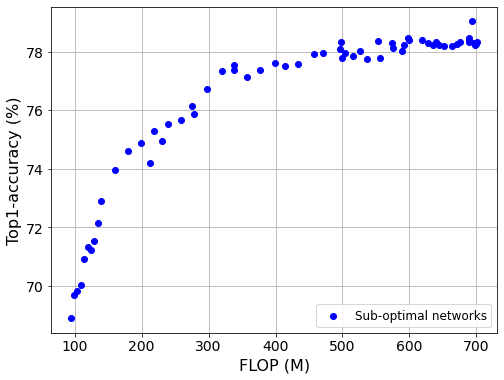

In [31]:
###Overall points
#data3 = np.delete(data3,12,axis = 0)
from matplotlib import pyplot as plt
import numpy as np
plt.figure(figsize=(8,6))
#plt.plot(latency_list,top1s)
n=np.arange(len(data))
plt.scatter(data[:,1],data[:,0],c='blue',label='Sub-optimal networks')

#for i,txt in enumerate(n):
    #plt.annotate(txt,(data[i][1],data[i][0]))
plt.xlabel('FLOP (M)', size=16)
plt.ylabel('Top1-accuracy (%)', size=16)
plt.rcParams['axes.axisbelow'] = True
plt.grid(True)
#plt.xticks(np.arange(35,90,5))
#plt.yticks(np.arange(65,80,1))
#plt.show()
plt.legend(loc='lower right',prop = {'size':12})
plt.tick_params(labelsize=14)


In [32]:
label = [1 for _ in range(len(data))]
for d in range(len(data)):
    for i in range(len(data)):
        if data[d][0] < data[i][0] and data[d][1] > data[i][1]:
            label[d] = 0
result = []
result_configs = []
result_bn = []
for i in range(len(label)):
    if label[i] == 1:
        result.append(data[i])
        result_configs.append(configs[i])
        result_bn.append(bn_lists[i])

In [33]:
data = np.array(result)
index = data[:,1].argsort()
data = data[index]
result_configs = np.array(result_configs)
result_configs = result_configs[index]
result_bn = np.array(result_bn)
result_bn = result_bn[index]
data.shape,result_configs.shape,result_bn.shape

((27, 2), (27,), (27, 1, 2))

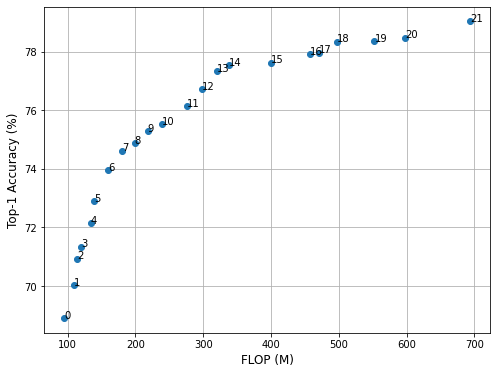

In [45]:
from matplotlib import pyplot as plt
import numpy as np
plt.figure(figsize=(8,6))
#plt.plot(latency_list,top1s)
n=np.arange(len(data))
plt.scatter(data[:,1],data[:,0])
for i,txt in enumerate(n):
    plt.annotate(txt,(data[i][1],data[i][0]))
plt.xlabel('FLOP (M)', size=12)
plt.ylabel('Top-1 Accuracy (%)', size=12)
#plt.legend(loc='lower right')
plt.grid(True)

In [35]:
data

array([[  68.912   ,   94.950769],
       [  69.686   ,   99.531225],
       [  69.832   ,  103.948505],
       [  70.022   ,  109.088937],
       [  70.928   ,  114.160247],
       [  71.346   ,  119.571319],
       [  71.546   ,  129.244408],
       [  72.148   ,  134.151092],
       [  72.888   ,  139.464959],
       [  73.948   ,  159.828596],
       [  74.626   ,  179.801088],
       [  74.868   ,  198.920904],
       [  75.282   ,  217.847971],
       [  75.528   ,  238.651932],
       [  75.676   ,  258.73479 ],
       [  76.134   ,  275.47    ],
       [  76.71    ,  297.610323],
       [  77.334   ,  319.994581],
       [  77.54    ,  337.35    ],
       [  77.62    ,  399.783974],
       [  77.914   ,  457.098114],
       [  77.956   ,  470.918575],
       [  78.08    ,  495.61061 ],
       [  78.346   ,  497.4     ],
       [  78.352   ,  552.480582],
       [  78.472   ,  598.17783 ],
       [  79.03    ,  693.5     ]])

In [44]:
data = np.delete(data,18,axis = 0)
result_configs = np.delete(result_configs,18,axis = 0)
result_bn = np.delete(result_bn,18,axis = 0)

In [47]:
data.shape,result_configs.shape,result_bn.shape

((22, 2), (22,), (22, 1, 2))

In [48]:
with open('22_flop_gpu_nets.pickle','wb') as file:
    pickle.dump(
    {
        'accu_lat':list(data),
        'configs':list(result_configs),
        'bn_list':result_bn
    },
file,pickle.HIGHEST_PROTOCOL)

In [49]:
flops = data[:,1]

In [50]:
flops

array([  94.950769,  109.088937,  114.160247,  119.571319,  134.151092,
        139.464959,  159.828596,  179.801088,  198.920904,  217.847971,
        238.651932,  275.47    ,  297.610323,  319.994581,  337.35    ,
        399.783974,  457.098114,  470.918575,  497.4     ,  552.480582,
        598.17783 ,  693.5     ])

In [51]:
accu = data[:,0]
accu

array([ 68.912,  70.022,  70.928,  71.346,  72.148,  72.888,  73.948,
        74.626,  74.868,  75.282,  75.528,  76.134,  76.71 ,  77.334,
        77.54 ,  77.62 ,  77.914,  77.956,  78.346,  78.352,  78.472,
        79.03 ])